In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading Raw data


In [3]:
df_raw = pd.read_csv("/content/drive/MyDrive/week 1/raw_analyst_ratings.csv")
df_raw.tail()

,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


**Discreptive statstics**

In [5]:
publisher_counts = df_raw["publisher"].value_counts()
print("The most ten top publishers")
publisher_counts.head(10)

The most ten top publishers


,count
publisher,
Paul Quintaro,228373
Lisa Levin,186979
Benzinga Newsdesk,150484
Charles Gross,96732
Monica Gerson,82380
Eddie Staley,57254
Hal Lindon,49047
ETF Professor,28489
Juan Lopez,28438


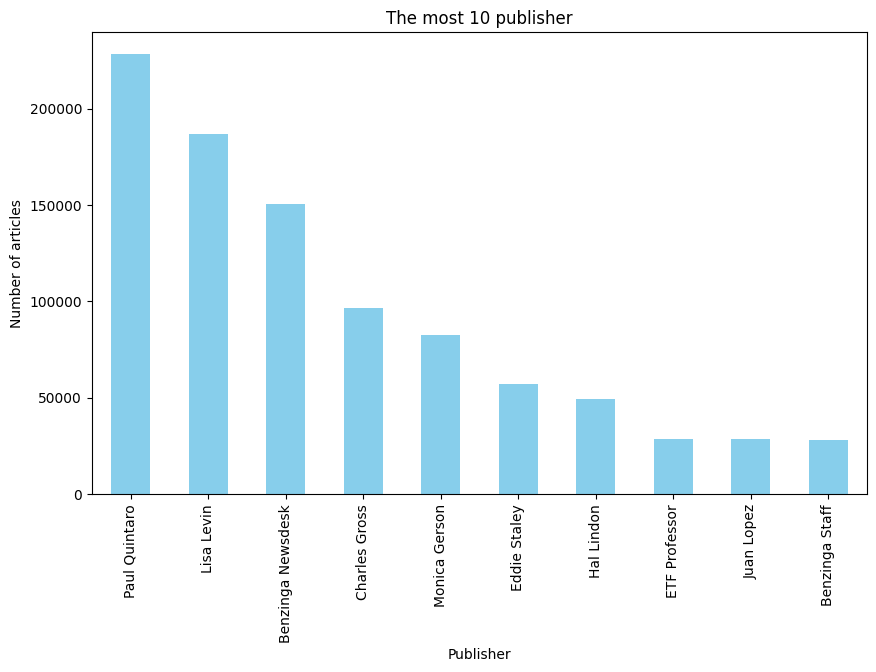

In [6]:
publisher_counts.head(10).plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title("The most 10 publisher")
plt.ylabel("Number of articles")
plt.xlabel("Publisher")
plt.show()

<ipython-input-7-57add77b0c88>:4: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  df_raw.set_index('datetime')['headline'].resample('w').count().plot(figsize=(10,6))


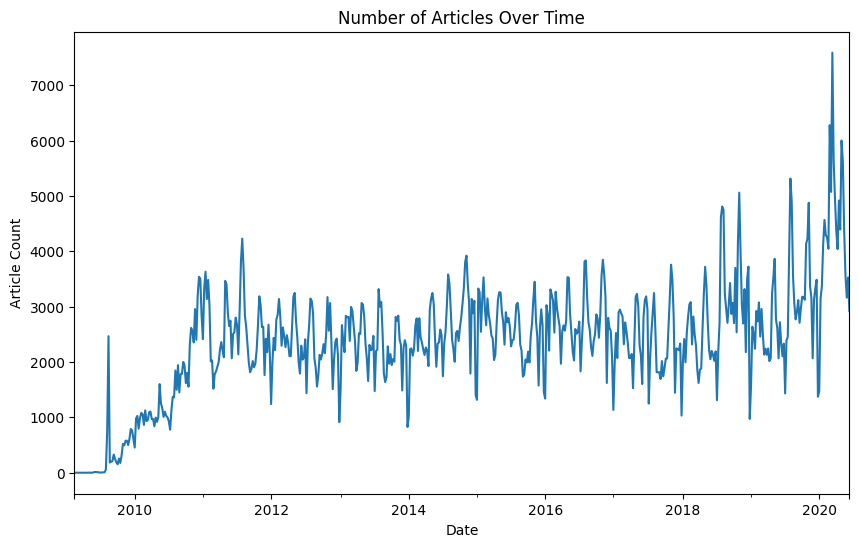

In [7]:
# Chenging to date time data type

df_raw['datetime']= pd.to_datetime(df_raw['date'], format='mixed', utc=True)
df_raw.set_index('datetime')['headline'].resample('w').count().plot(figsize=(10,6))
plt.title('Number of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Article Count')
plt.show()

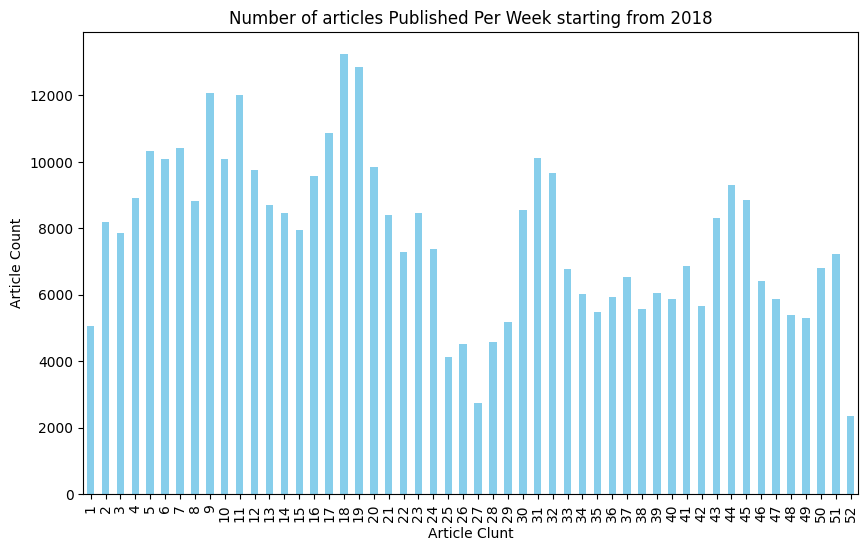

In [8]:
df_filtered=df_raw[df_raw['datetime'] >= "2018-01-01"]
articles_by_year = df_filtered['datetime'].dt.isocalendar().week.value_counts().sort_index()
articles_by_year.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Number of articles Published Per Week starting from 2018')
plt.xlabel('Article Clunt')
plt.ylabel('Article Count')
plt.show()


**Text Analysis**





In [10]:
#sentiment analysis on Headlines
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def sentiment_score(text):
  score = analyzer. polarity_scores(text)
  return score['compound']
df_raw['sentiment_score'] = df_raw['headline'].apply(sentiment_score)
df_raw['sentiment'] = df_raw['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)
print (df_raw.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock                  datetime  sentiment_score  \
0  2020-06-05 10:30:54-04:00     A 2020-06-05 14:30:54+00:0

**Extract Keywords and Topics**

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
def preprocess_text(text):
  """
    takes input text and retuns lower cased, tokenize text
  """
  text =re.sub(r'[^a-zA-Z\s]', "", text)
  test= text.lower()
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stopwords.words('english')] # Remove stopwords
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return tokens
df_raw['tokens'] = df_raw['headline'].apply(preprocess_text)


In [14]:
# Extracting Keywords

from sklearn.feature_extraction.text import CountVectorizer

all_headlines = ' '.join([' '.join(tokens) for tokens in df_raw['tokens']])

vectorizer = CountVectorizer(max_features= 30, stop_words='english')
keywords = vectorizer.fit_transform([all_headlines])

In [15]:
print(vectorizer.get_feature_names_out())

['announces' 'benzingas' 'buy' 'company' 'downgrades' 'earnings' 'eps'
 'est' 'estimate' 'higher' 'maintains' 'market' 'moving' 'new' 'price'
 'pt' 'raises' 'reports' 'sales' 'says' 'session' 'share' 'shares' 'stock'
 'stocks' 'target' 'trading' 'update' 'upgrades' 'week']


In [16]:
# Perform Topic Modeling with LDA

from gensim import corpora
from gensim.models import LdaModel

tokenized_headlines = df_raw['tokens']

dictionary = corpora.Dictionary (tokenized_headlines)
corpus = [dictionary.doc2bow(text) for text in tokenized_headlines]

lda_model = LdaModel(corpus= corpus, id2word=dictionary, num_topics=5, passes= 10)

for idx, topic in lda_model.print_topics(num_topics = 5, num_words= 10):
  print(f"Topic #{idx +1}: {topic}")

Topic #1: 0.043*"Up" + 0.034*"Down" + 0.022*"For" + 0.022*"ETFs" + 0.016*"To" + 0.016*"Sector" + 0.014*"Energy" + 0.014*"ETF" + 0.014*"Top" + 0.013*"Retail"
Topic #2: 0.098*"M" + 0.089*"v" + 0.089*"Q" + 0.073*"Est" + 0.067*"EPS" + 0.061*"Reports" + 0.053*"Sales" + 0.032*"B" + 0.023*"Sees" + 0.020*"Estimate"
Topic #3: 0.035*"Stocks" + 0.032*"In" + 0.027*"For" + 0.026*"The" + 0.022*"Earnings" + 0.020*"On" + 0.017*"Market" + 0.014*"Update" + 0.014*"MidDay" + 0.014*"Week"
Topic #4: 0.035*"Price" + 0.027*"PT" + 0.021*"Announces" + 0.021*"Buy" + 0.019*"Maintains" + 0.019*"Target" + 0.019*"Raises" + 0.018*"UPDATE" + 0.014*"With" + 0.014*"Initiates"
Topic #5: 0.031*"Shares" + 0.020*"trading" + 0.018*"company" + 0.015*"Alert" + 0.015*"Option" + 0.014*"Biggest" + 0.013*"Movers" + 0.013*"From" + 0.011*"Trade" + 0.011*"several"


In [17]:
def assign_topic(tokens):
    bow = dictionary.doc2bow(tokens)
    topics = lda_model[bow]
    return max(topics, key=lambda x: x[1])[0]  # Topic with the highest probability

df_raw['topic'] = df_raw['tokens'].apply(assign_topic)


In [8]:
df_trans= pd.read_csv('/content/drive/MyDrive/week 1/transformed_raw.csv')
df_trans.head()

,Unnamed: 0,headline,url,publisher,date,stock,datetime,sentiment_score,sentiment,tokens,topic
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05 14:30:54+00:00,0.000,Neutral,"['Stocks', 'That', 'Hit', 'Week', 'Highs', 'On...",2
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03 14:45:20+00:00,0.000,Neutral,"['Stocks', 'That', 'Hit', 'Week', 'Highs', 'On...",2
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26 08:30:07+00:00,0.000,Neutral,"['Biggest', 'Movers', 'From', 'Friday']",4
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22 16:45:06+00:00,0.000,Neutral,"['Stocks', 'Moving', 'In', 'Fridays', 'MidDay'...",2
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22 15:38:59+00:00,0.296,Positive,"['B', 'A', 'Securities', 'Maintains', 'Neutral...",3


Group by publisher and analyze the topics (from LDA or keyword analysis).


In [32]:
top_publishers = df_trans['publisher'].value_counts()[:20]
top_publishers

,count
publisher,
Paul Quintaro,228373
Lisa Levin,186979
Benzinga Newsdesk,150484
Charles Gross,96732
Monica Gerson,82380
Eddie Staley,57254
Hal Lindon,49047
ETF Professor,28489
Juan Lopez,28438


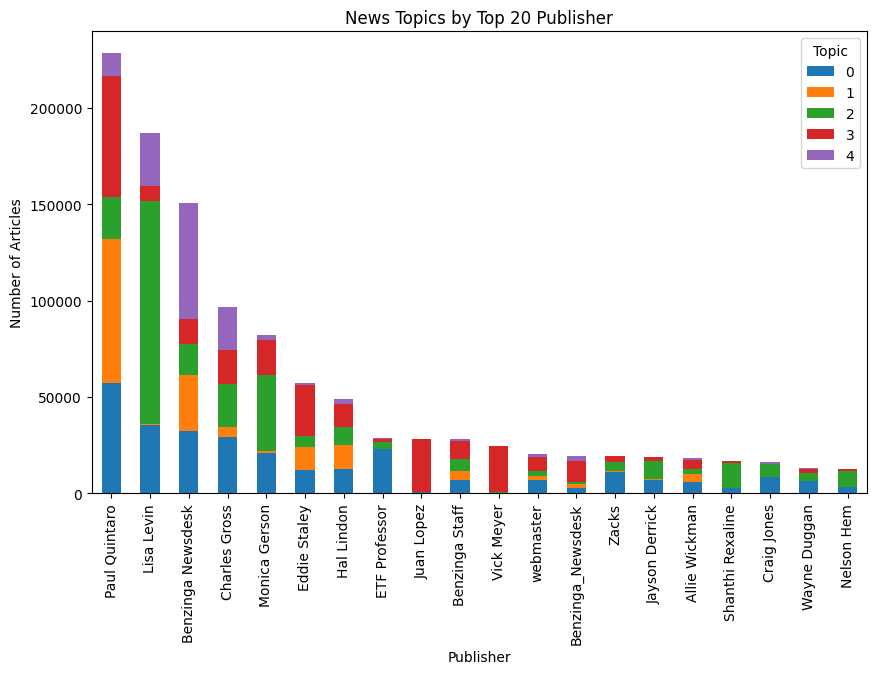

In [36]:
# Group by publisher and topic
publisher_topic_distribution = df_trans.groupby(['publisher', 'topic']).size().unstack(fill_value=0)
top_publishers_name = top_publishers.index
# Plot the distribution
publisher_topic_distribution.loc[top_publishers_name].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("News Topics by Top 20 Publisher")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.legend(title="Topic")
plt.show()


** Unique Domains for Publishers**

In [39]:
import re

# Extract domain from email-like publisher names
def extract_domain(email):
    match = re.search(r'@(\w+\.\w+)', email)
    return match.group(1) if match else 'unknown'

df_trans['publisher_domain'] = df_trans['publisher'].apply(extract_domain)

# Group by domain and count
domain_counts = df_trans['publisher_domain'].value_counts()

# Display top 10 domains
print(domain_counts.head(10))




publisher_domain
unknown                   1399240
benzinga.com                 7937
gmail.com                     139
andyswan.com                    5
investdiva.com                  2
tothetick.com                   2
eosdetroit.io                   1
forextraininggroup.com          1
stockmetrix.net                 1
Name: count, dtype: int64


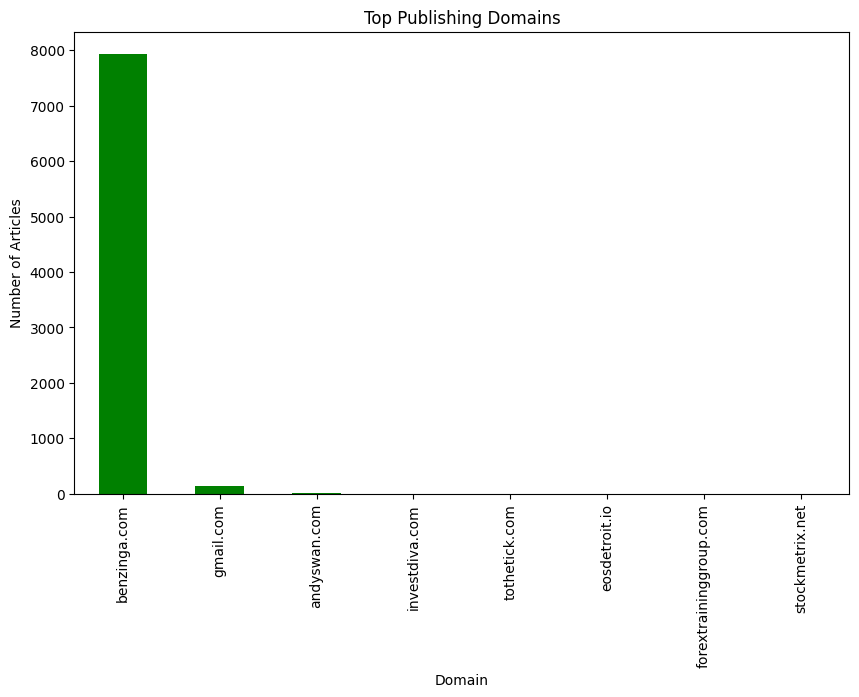

In [41]:
# Plot domains
domain_counts.head(10)[1:].plot(kind='bar', figsize=(10, 6), color='green')
plt.title("Top Publishing Domains")
plt.xlabel("Domain")
plt.ylabel("Number of Articles")
plt.show()